In [2]:
# Import Matplotlib for charting
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
# Import modules to Create DataFrames
import numpy as np
import pandas as pd

# Import modules to assist with assigning dates
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Import Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Bring back all columns in the Measurement table
inspector = inspect(engine)

columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Bring back all columns in the Station table
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Print result
recent_date

('2017-08-23',)

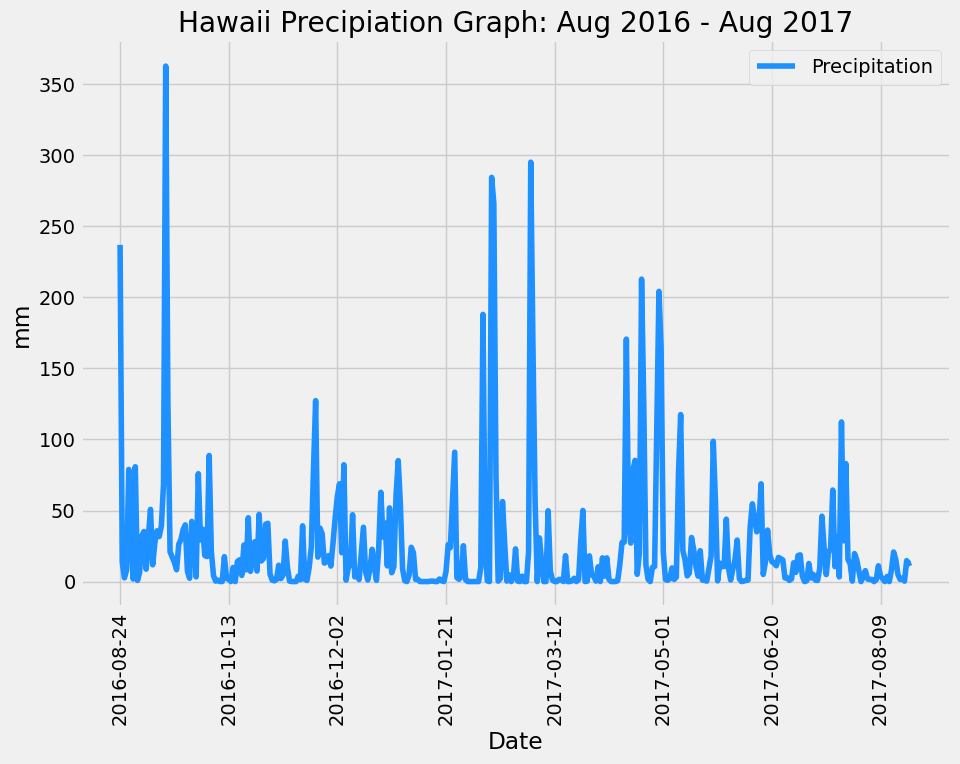

<Figure size 640x480 with 0 Axes>

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the most recent date in the dataset 
# ask questions on this one to tutor
latest_date = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
start_date = latest_date - dt.timedelta(days=365)
start_date

# Perform a query to retrieve the data and precipitation scores
# create a list to hold sum of precipitation scores
sum_prcp = [Measurement.date, func.sum(Measurement.prcp)]

# loop through the data to create the completed list of values 
# why is the * needed before sum_prcp on this one?
prcp_results = session.query(*sum_prcp).filter(Measurement.date >= start_date).group_by(Measurement.date).all()

# print the results
prcp_results

# Save the query results as a Pandas DataFrame
prcp_df = pd.DataFrame(data = prcp_results, columns=["Date", "Precipitation"])

# Set the index to the date column
prcp_df = prcp_df.set_index("Date")
# prcp_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
# graph doesn't match example in the PRCP field - is this because we used MM in Australia rather than inches?
prcp_chart = prcp_df.plot(title = "Hawaii Precipiation Graph: Aug 2016 - Aug 2017",\
                          xlabel="Date", ylabel = "mm", rot = 90, figsize=(10,7), color = 'dodgerblue')

# Show the results
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,365.000000
mean,24.760274
std,45.113719
min,0.000000
25%,1.400000
50%,10.100000
75%,27.500000
max,362.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
station = session.query(Measurement).group_by(Measurement.station).count()
station

9

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station) \
    .order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# calculate the highest temperature
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()

# calculate the lowest temperature
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()

# calculate the average temperature
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()

print('Highest Temperature:', highest_temp)
print('Lowest Temperature:', lowest_temp)
print('Average Temperature:', avg_temp)

Highest Temperature: (29.4,)
Lowest Temperature: (12.2,)
Average Temperature: (22.03582251082252,)


In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Find the most recent date for the station with the highest activity
station_recent_date = session.query(Measurement.date).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first()

# Print result
station_recent_date

('2017-08-18',)

In [21]:
# Create the variable for one year prior to this so that you can only take the last year of active data
station_latest_date = dt.datetime.strptime(station_recent_date[0], '%Y-%m-%d')
station_start_date = station_latest_date - dt.timedelta(days=365)

# Print result
station_start_date

datetime.datetime(2016, 8, 18, 0, 0)

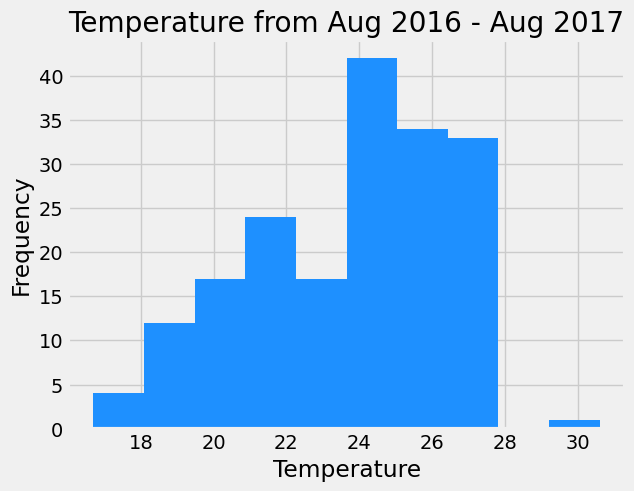

<Figure size 640x480 with 0 Axes>

In [22]:
# create a list to hold sum of precipitation scores
sum_tobs = [Measurement.date, func.sum(Measurement.tobs)]

# loop through the data and create the completed list of values 
tobs_results = session.query(*sum_tobs).filter(Measurement.station == 'USC00517948') \
.filter(Measurement.date >= station_start_date).group_by(Measurement.date).all()

# print the results
# tobs_results

# # Save the query results as a Pandas DataFrame
tobs_df = pd.DataFrame(data = tobs_results, columns=["Date", "Temperature"])

# set the index to the date column
tobs_df = tobs_df.set_index("Date")
# tobs_df.head()

# Use Pandas Plotting with Matplotlib to plot the data in a histogram
plt.hist(tobs_df, color = 'dodgerblue')

# label the graph        
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature from Aug 2016 - Aug 2017')
      
# show the graph
plt.show()

# Close session

In [23]:
# Close Session
session.close()